In [32]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [33]:
# Drop
application_df = application_df.drop(columns=['EIN', 'NAME'], axis =1)

In [34]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [35]:
# income
income_counts = application_df.INCOME_AMT.value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

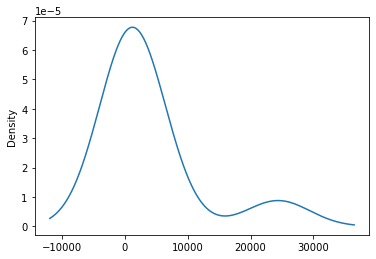

In [36]:
income_counts.plot.density()

In [37]:
replace_income = list(income_counts[income_counts < 200].index)

for income in replace_income:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(income,"Other")
    
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
Other              324
10M-50M            240
Name: INCOME_AMT, dtype: int64

In [38]:
# Application Type
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

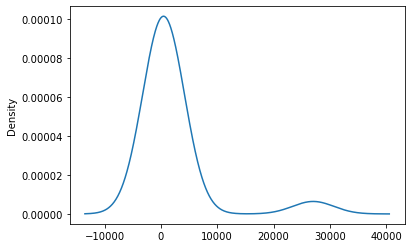

In [39]:
application_counts.plot.density()

In [40]:
replace_application = list(application_counts[application_counts < 500].index)

for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [41]:
# Classification
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1236        1
C2170        1
C1370        1
C4200        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

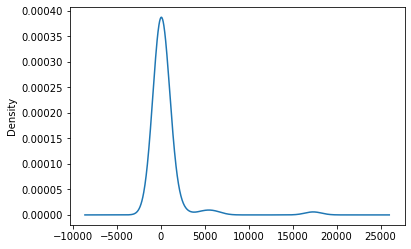

In [42]:
classification_counts.plot.density()

In [43]:
replace_class = list(classification_counts[classification_counts < 1000].index)

for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [44]:
# Affiliation
affiliation_counts = application_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

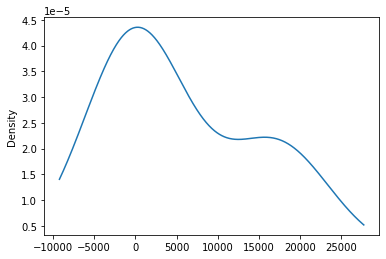

In [45]:
affiliation_counts.plot.density()

In [46]:
replace_aff = list(affiliation_counts[affiliation_counts < 1000].index)

for aff in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [47]:
# Use Case
use_case_counts = application_df.USE_CASE.value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot:ylabel='Density'>

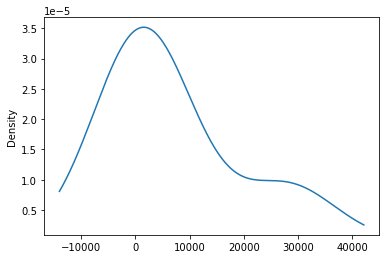

In [48]:
use_case_counts.plot.density()

In [49]:
replace_use_case = list(use_case_counts[use_case_counts < 1000].index)

for case in replace_use_case:
    application_df.USE_CASE = application_df.USE_CASE.replace(case,"Other")
    
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [50]:
# Organization
org_counts = application_df.ORGANIZATION.value_counts()
org_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot:ylabel='Density'>

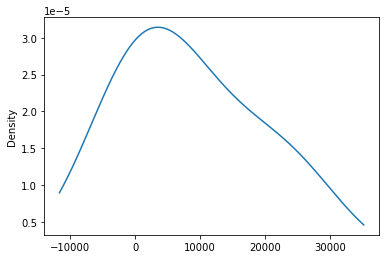

In [51]:
org_counts.plot.density()

In [52]:
replace_org = list(org_counts[org_counts < 1000].index)

for org in replace_org:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org,"Other")
    
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [53]:
# Categorical variable list
application_cat = application_df.dtypes[application_df.dtypes =='object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [54]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

In [55]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [57]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80        
nodes_hidden_layer2 = 80
nodes_hidden_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               4440      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 18,221
Trainable params: 18,221
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Define the checkpoint path and filenames
os.makedirs("checkpointsOptimzation/", exist_ok=True)
checkpoint_path = "checkpointsOptimzation/weights.{epoch:02d}hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)
    
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5755 - accuracy: 0.7202
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5569 - accuracy: 0.7288
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5538 - accuracy: 0.7313
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5519 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5514 - accuracy: 0.7326

Epoch 00005: saving model to checkpointsOptimzation/weights.05hdf5
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5499 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7331
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5483 - accuracy: 0.7337
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5474 - accuracy: 0.7334
Epoch 10/100
804/804 [=

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 0s - loss: 0.5668 - accuracy: 0.7240
Loss: 0.5667700171470642, Accuracy: 0.7239649891853333


In [62]:
# Export the model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')